# Deep Learning parte 1 Introdução com Keras

## Objetivos
* Aprenda conceitos essenciais de Deep Learning na prática.
* Construa e treine um modelo com Keras e Tensorflow.
* Saiba como selecionar as camadas de um modelo.
* Avalie a performance do modelo e melhore seus resultados.
* Aplique Deep Learning para classificar imagens.

Link: https://cursos.alura.com.br/course/deep-learning-introducao-com-keras

## Importando as bibliotecas necessárias

In [42]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

## Carregando os dados

In [2]:
dataset = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
tabela_categorias = pd.read_html('https://github.com/zalandoresearch/fashion-mnist')[1]
tabela_categorias

,Label,Description
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


## Exploração dos dados

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

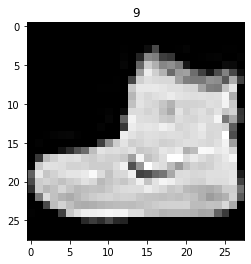

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

plt.show()

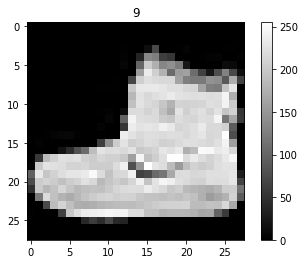

In [7]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.title(y_train[0])

plt.show()

In [8]:
print(y_train.min())
print(y_train.max())

0
9


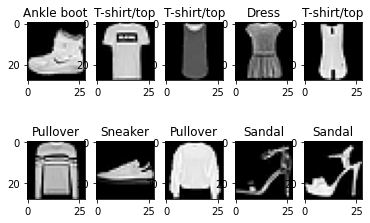

In [9]:
for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(X_train[imagem], cmap='gray')
  identificador = y_train[imagem]
  plt.title(tabela_categorias.query('Label == @identificador')['Description'].values[0])

In [10]:
modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(X_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 3.5163


### Normalizando os dados de treino

In [11]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(X_train_normalizado, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4910


### Adicionando mais camadas internas

In [12]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(X_train_normalizado, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4791


In [13]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(64, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(X_train_normalizado, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4796


### Aumentando o número de Epoch, ou seja, aumentando o número de processos de treino

In [14]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
modelo.fit(X_train_normalizado, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4836 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3629 - accuracy: 0.8672
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3258 - accuracy: 0.8811
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3022 - accuracy: 0.8887
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2842 - accuracy: 0.8957


In [15]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
modelo.fit(X_train_normalizado, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4786 - accuracy: 0.8280
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3600 - accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3253 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2994 - accuracy: 0.8886
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2848 - accuracy: 0.8934


In [16]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(64, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])
modelo.fit(X_train_normalizado, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4851 - accuracy: 0.8228
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3644 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3308 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3043 - accuracy: 0.8875
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2879 - accuracy: 0.8921


### Melhor modelo até agora

In [23]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(X_train_normalizado, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 0.4949 - accuracy: 0.8230 - val_loss: 0.3924 - val_accuracy: 0.8572
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8662 - val_loss: 0.3596 - val_accuracy: 0.8687
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3311 - accuracy: 0.8780 - val_loss: 0.3748 - val_accuracy: 0.8669
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3057 - accuracy: 0.8865 - val_loss: 0.3519 - val_accuracy: 0.8746
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2855 - accuracy: 0.8930 - val_loss: 0.3280 - val_accuracy: 0.8827
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.8975 - val_loss: 0.3408 - val_accuracy: 0.8763
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2593 - accuracy: 0.9027 - val_loss: 0.3185 - val_accuracy:

In [24]:
historico.history

{'accuracy': [0.8229583501815796,
  0.8662083148956299,
  0.877958357334137,
  0.8864791393280029,
  0.8930208086967468,
  0.8975416421890259,
  0.9026874899864197,
  0.9073125123977661,
  0.9112291932106018,
  0.9149791598320007,
  0.9171666502952576,
  0.9189791679382324,
  0.9227916598320007,
  0.925083339214325,
  0.926729142665863,
  0.9290624856948853,
  0.9321458339691162,
  0.9360208511352539,
  0.9356874823570251,
  0.9382083415985107,
  0.9400208592414856,
  0.9411666393280029,
  0.942145824432373,
  0.9452083110809326,
  0.945562481880188,
  0.9485416412353516,
  0.9510833621025085,
  0.9488750100135803,
  0.9502500295639038,
  0.95291668176651],
 'loss': [0.49487245082855225,
  0.3658895790576935,
  0.3311278522014618,
  0.30569934844970703,
  0.2855471074581146,
  0.2730165719985962,
  0.2593475878238678,
  0.24565069377422333,
  0.2365283966064453,
  0.22695745527744293,
  0.21780233085155487,
  0.21157443523406982,
  0.2038702815771103,
  0.19533011317253113,
  0.1907384

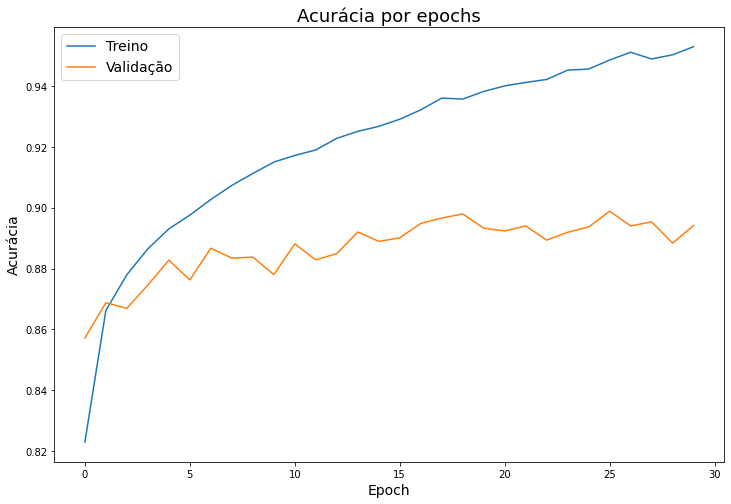

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title('Acurácia por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Acurácia', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

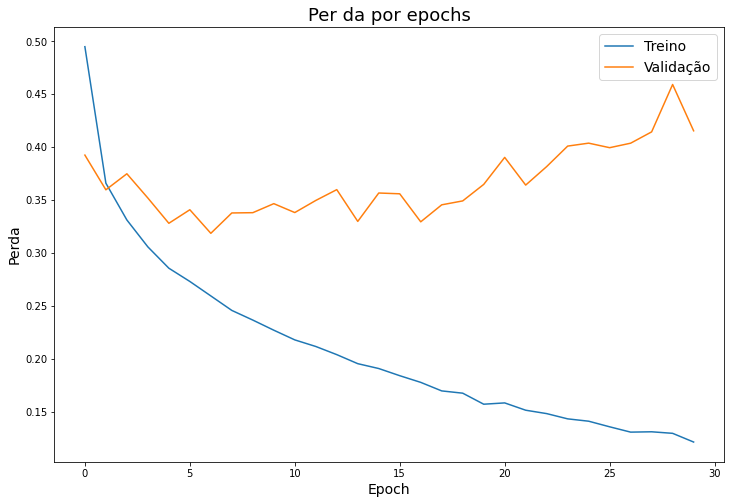

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title('Per da por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Perda', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

In [27]:
testes = modelo.predict(X_test/255)
print(f'O resultado do teste: {np.argmax(testes[0])}')
print(f'O número da imagem de teste: {y_test[0]}')

O resultado do teste: 9
O número da imagem de teste: 9


In [28]:
print(f'O resultado do teste: {np.argmax(testes[1])}')
print(f'O número da imagem de teste: {y_test[1]}')

O resultado do teste: 2
O número da imagem de teste: 2


In [29]:
perda_teste, acuracia_teste = modelo.evaluate(X_test/255, y_test)

print(f'Perda do teste: {perda_teste}')
print(f'Acurácia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.8892
Perda do teste: 0.44697773456573486
Acurácia do teste: 0.88919997215271


### Adicionando uma camada Dropout
https://keras.io/api/layers/regularization_layers/dropout/

Tecnica que ajuda quando o modelo está overfitting, o DropOut seleciona alguns neuronios que são ignorados durante o treinamento e com isso 

In [37]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dropout(0.2 ),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(X_train_normalizado, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5234 - accuracy: 0.8119 - val_loss: 0.4528 - val_accuracy: 0.8277
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3855 - accuracy: 0.8597 - val_loss: 0.4177 - val_accuracy: 0.8493
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3462 - accuracy: 0.8720 - val_loss: 0.3741 - val_accuracy: 0.8702
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3202 - accuracy: 0.8809 - val_loss: 0.3608 - val_accuracy: 0.8695
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3026 - accuracy: 0.8877 - val_loss: 0.3299 - val_accuracy: 0.8802
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2840 - accuracy: 0.8941 - val_loss: 0.3329 - val_accuracy: 0.8825
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.8992 - val_loss: 0.3170 - val_accuracy:

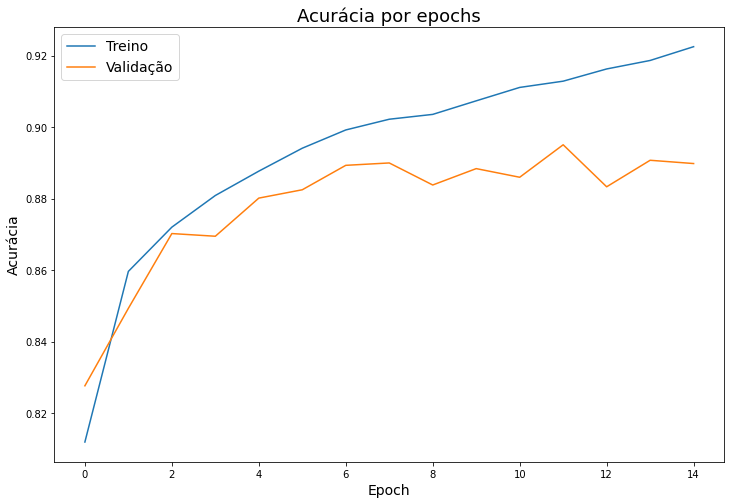

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title('Acurácia por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Acurácia', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

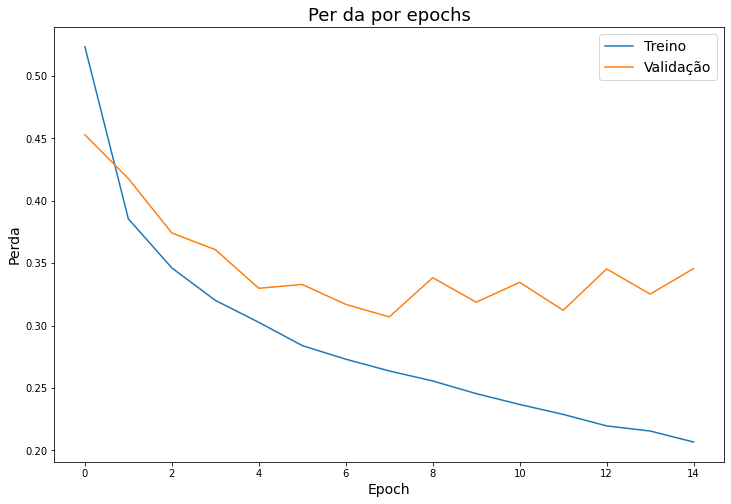

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title('Per da por epochs', fontsize=18)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Perda', fontsize=14)
plt.legend(['Treino', 'Validação'], fontsize=14)
plt.show()

In [43]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [44]:
testes = modelo_salvo.predict(X_test/255)
print(f'O resultado do teste: {np.argmax(testes[0])}')
print(f'O número da imagem de teste: {y_test[0]}')

O resultado do teste: 9
O número da imagem de teste: 9


## Modelo final criado, compilado, treinado e normalizado

In [ ]:
X_train_normalizado = X_train/255.0

modelo = keras.Sequential([
                           layers.Flatten(input_shape=(28,28)),
                           layers.Dense(256, activation=tensorflow.nn.relu),
                           layers.Dense(128, activation=tensorflow.nn.relu),
                           layers.Dropout(0.2 ),
                           layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(X_train_normalizado, y_train, epochs=15, validation_split=0.2)

## Salvado o modelo final

In [46]:
perda_teste, acuracia_teste = modelo_salvo.evaluate(X_test/255, y_test)

print(f'Perda do teste: {perda_teste}')
print(f'Acurácia do teste: {acuracia_teste}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8832
Perda do teste: 0.3763449192047119
Acurácia do teste: 0.8831999897956848
